# Web Scraping
## What is Web Scraping?
Web scraping is **`data harvesting`** or data extraction from websites in a specified format from **`web pages`** of **`HTML`** (Hyper Text Markup Language) used to display on the Internet in the form of 
text, images, etc. from `publicly` available `web pages` Web scraping is `very useful` for `gathering` information. to analyze the data
## Objective?
-  **`Data Analysis`**: disclosed to the public It is very useful to get information. in order to bring the information to be **`analyzed`** accordingly
**`Various purposes`** `such as` price, text, pictures, etc.
- **`Data Collection and Management`**: It collects and manages a large amount of information from publicly available websites.
- **`Data visualization`**: Analyze and visualize images, prices and other factors that can shape a business strategy.
- **`Data mining`**: Use data from web scraping to do Data mining.
## Outcome?
- CSV files, databases, or spreadsheets, etc.

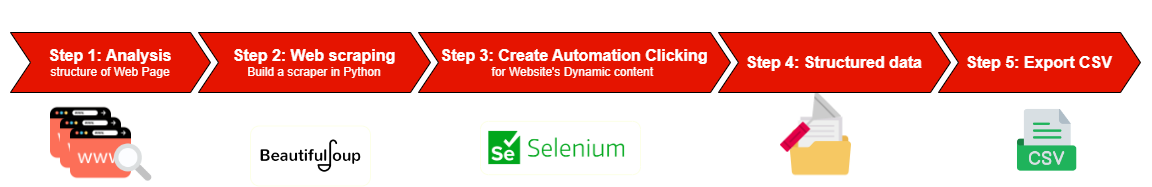

#  Library in Python for web scraping?
- BeautifulSoup
- Scrapy
- Selenium
- Requests
- Urllib3
- Lxml

# Initial Web scraping 
DrugBank Online : https://go.drugbank.com/drugs

# Import Library

In [1]:
import requests
import csv
import time
import numpy as np
import re
import pandas as pd
import json
import joblib

## Step 1. Analyze the site structure

Image 1: Total drugs
---

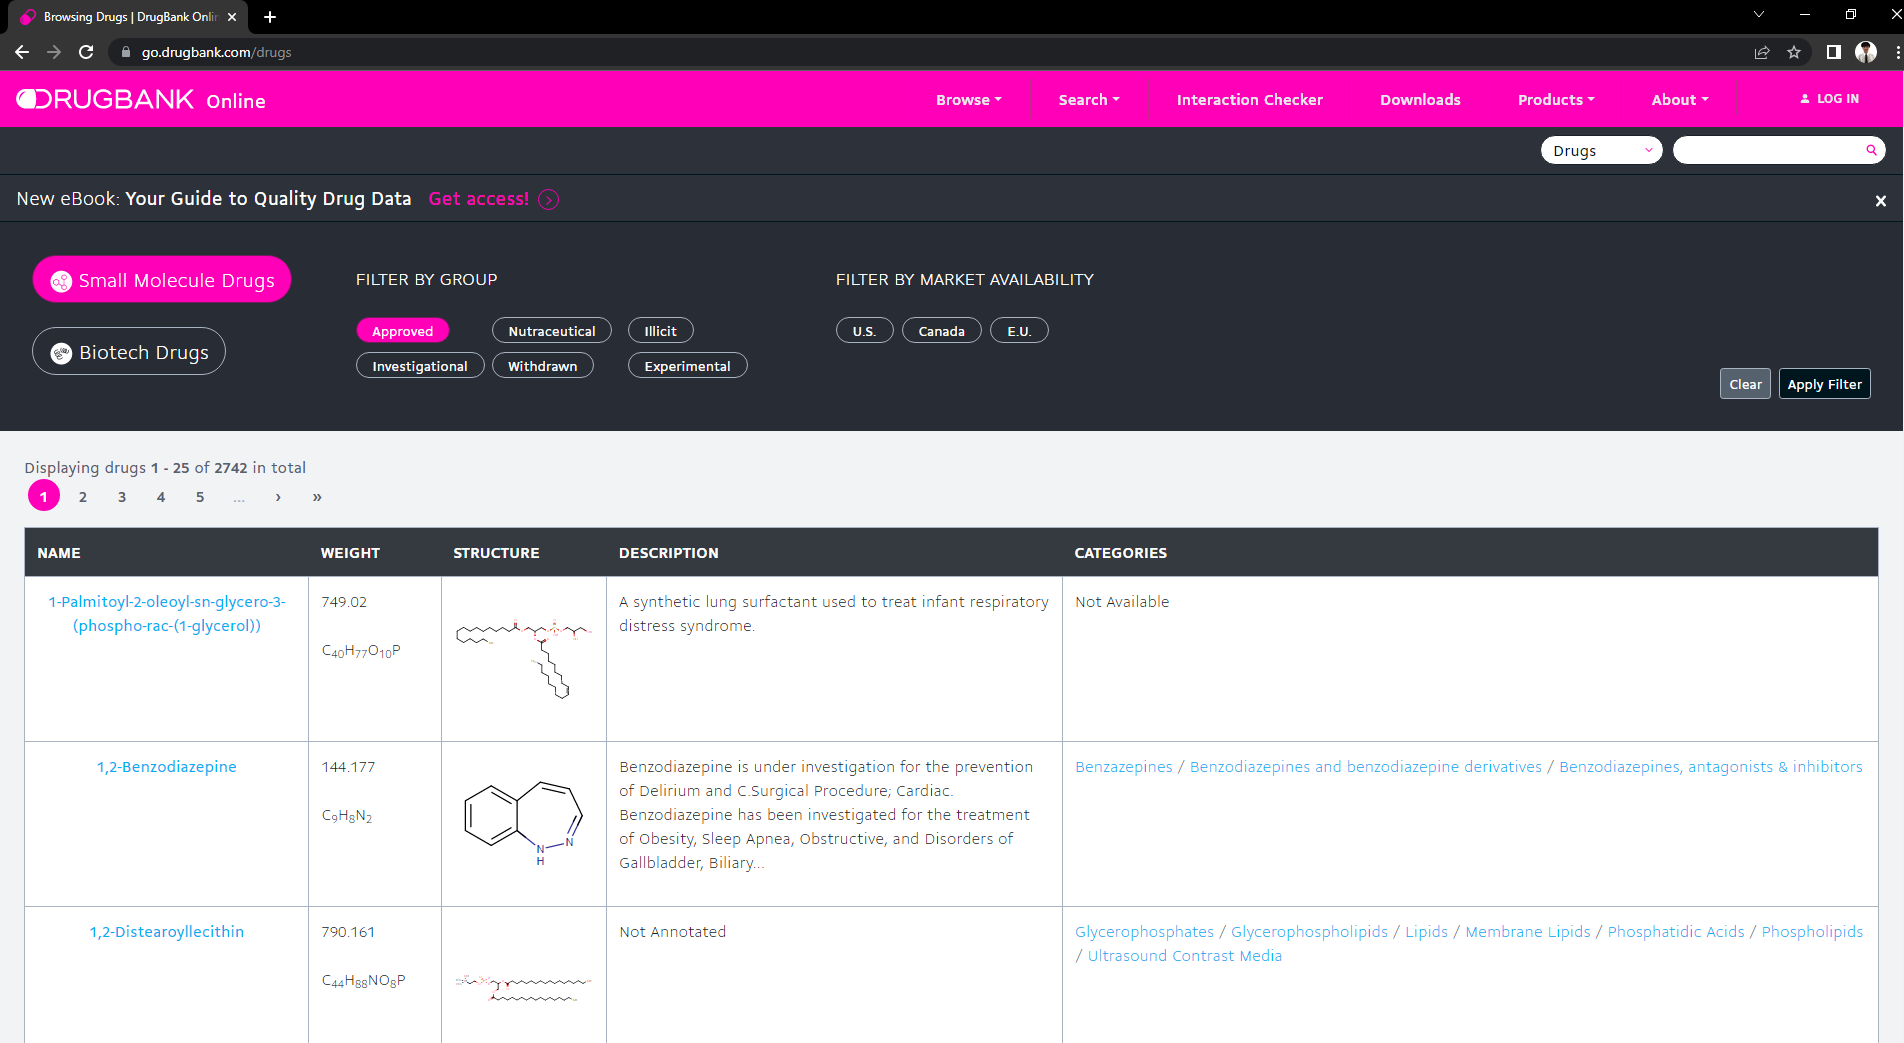

Image 2: In single Drug
---
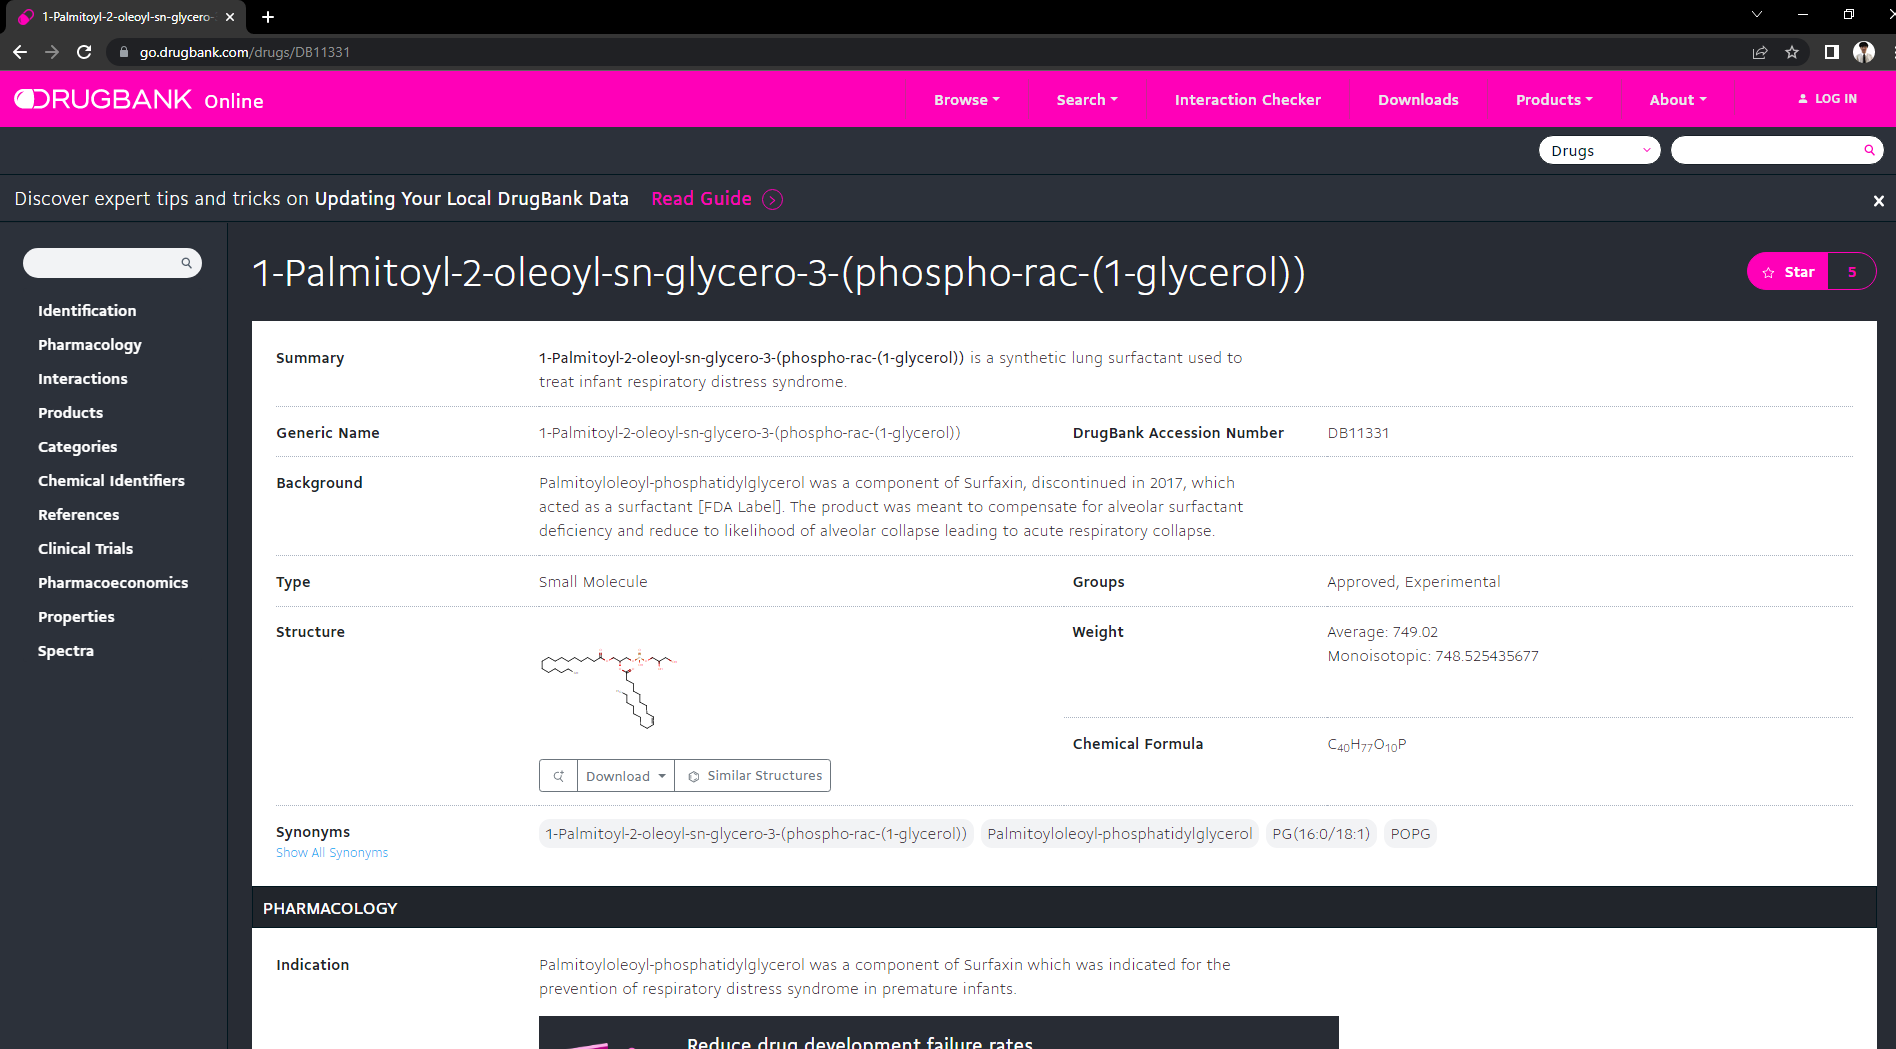

URL path changed by 'DrugBank Accession Numbers'
---
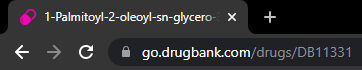


# Beautiful Soup 
## Objective
- get HTML page source
## Read more
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/

## Retrive 'DrugBank Accession Numbers' All Pages

In [2]:
from bs4 import BeautifulSoup

In [4]:
%%time
# Drug Names
drug_names = []
# DrugBank Accession Numbers
drug_bans = []

page = 1
while page <= 110:
    url = 'https://go.drugbank.com/drugs?approved=1&c=name&d=up&page='+str(page)
    req = requests.get(url)
    soup = BeautifulSoup(req.text, "html.parser")

    drugs = soup.find_all(
    'td', {'class': 'name-value text-sm-center drug-name'})
    
    for dr in drugs:
        drug_names.append(dr.text)
        ban = (dr.find('a').get("href").split('/')[2])
        drug_bans.append(ban)

    range_ = [n for n in range(101)[1::20]]
    if page in range_:
        print('Completed Scraping:', page ,'of', '110')
    page += 1

Completed Scraping: 1 of 110
Completed Scraping: 21 of 110
Completed Scraping: 41 of 110
Completed Scraping: 61 of 110
Completed Scraping: 81 of 110
CPU times: total: 5.11 s
Wall time: 57.8 s


## Convert to Pandas dataFrame

In [5]:
df = pd.DataFrame([drug_names, drug_bans]).T
df.columns = ['Name','DrugBankAccessionNumber']
df

,Name,DrugBankAccessionNumber
0,1-Palmitoyl-2-oleoyl-sn-glycero-3-(phospho-rac...,DB11331
1,"1,2-Benzodiazepine",DB12537
2,"1,2-Distearoyllecithin",DB14099
3,"1,2-icosapentoyl-sn-glycero-3-phosphoserine",DB14096
4,2-mercaptobenzothiazole,DB11496
...,...,...
2737,Zopiclone,DB01198
2738,Zotepine,DB09225
2739,Zucapsaicin,DB09120
2740,Zuclopenthixol,DB01624


## Step 1: Text

### < p >

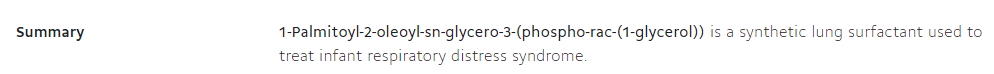
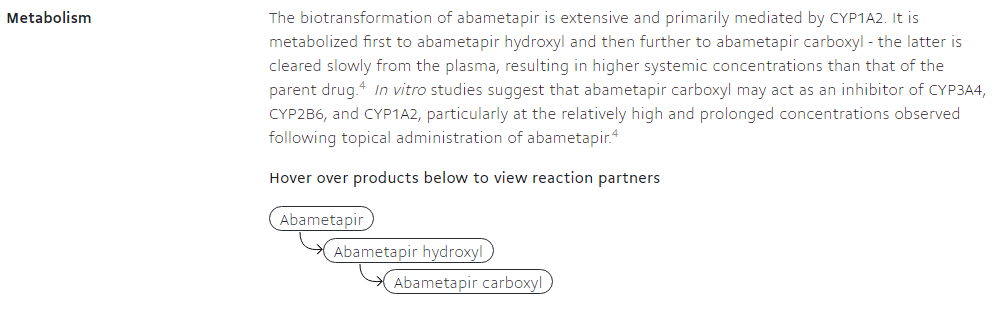

### < br > 

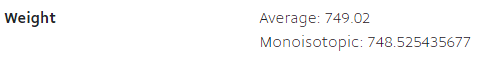

### < ul > contain < li > s

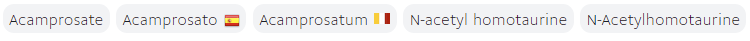
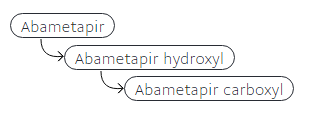

### < a > contain < li > s

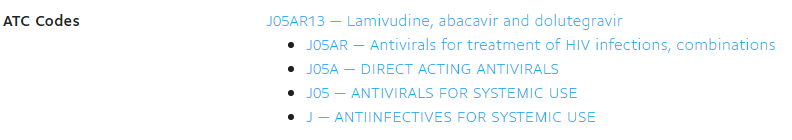

### < dl > contain < dt > < dd > s

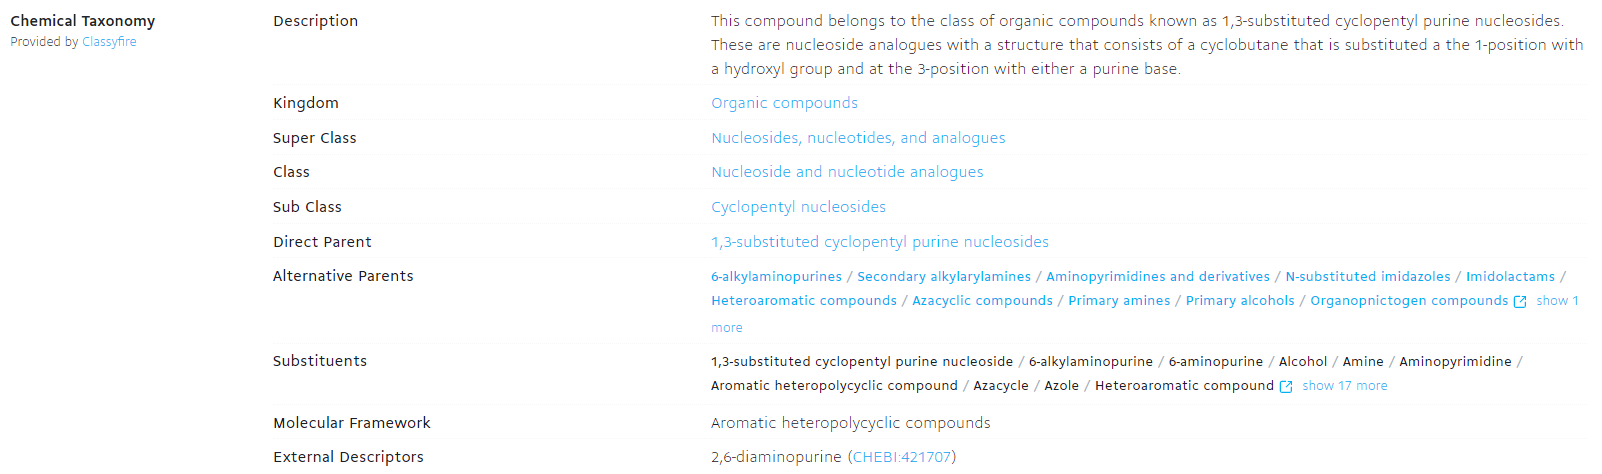

### < ul class="list-unstyled metabolite-pathway">

- Heaer < Span > 
- Sub < li > 
-  < a >

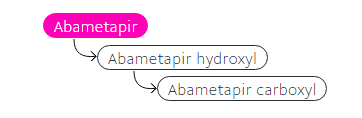

#### 1. < ul >

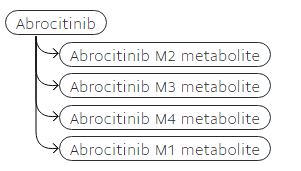

#### 2. < ul > + < p >

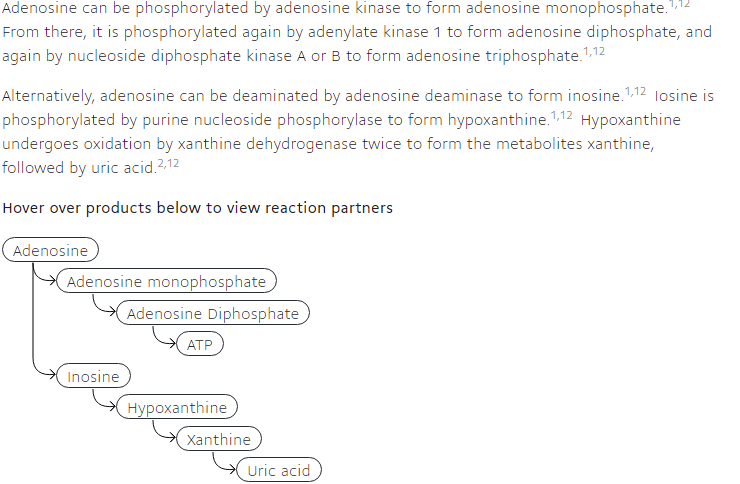

## Step 2 : < img >

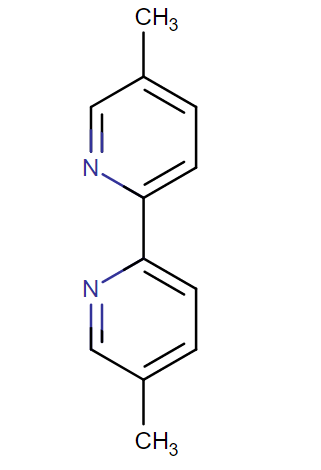
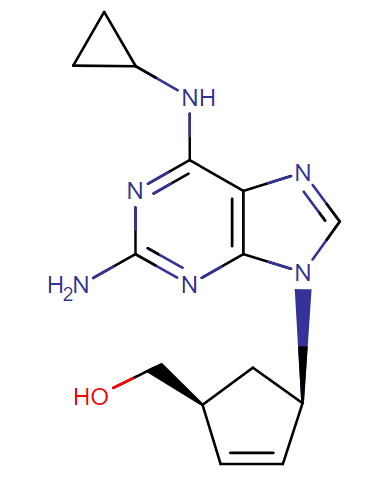
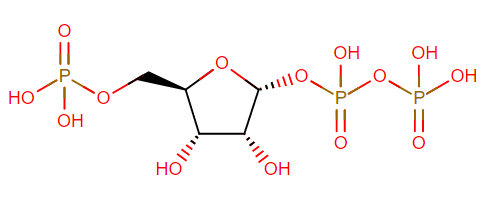

## Step 3: < div 'class'='product-carousel-row' < div >

## Example drug:
- https://go.drugbank.com/drugs/DB01048
- https://go.drugbank.com/drugs/DB00659
- https://go.drugbank.com/drugs/DB00819
- https://go.drugbank.com/drugs/DB00316

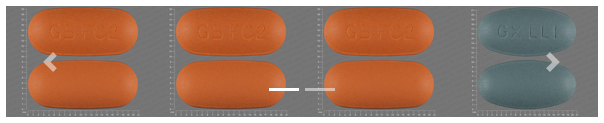
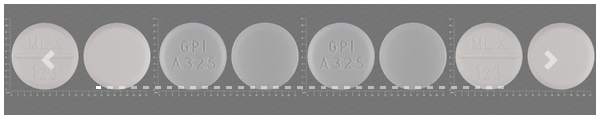
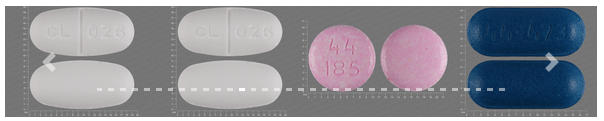
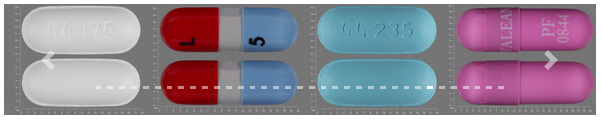
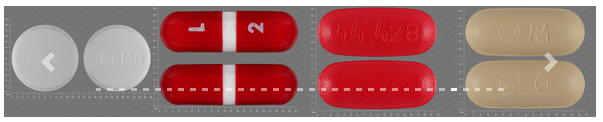
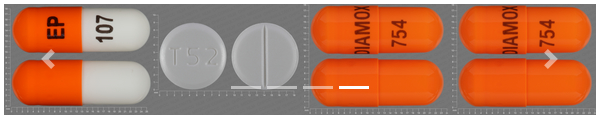

Example
site: https://go.drugbank.com/drugs/DB01048
----
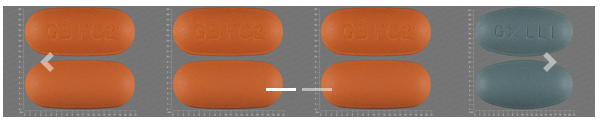
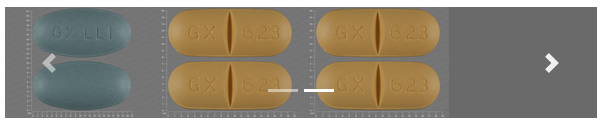

## Get 1 sample drug

In [11]:
url = 'https://go.drugbank.com/drugs/DB01048'
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")

In [13]:
drug_name = soup.find('h1').text
print(drug_name)
product_images = [] 
for dd in  soup.find_all('dd', {'class': 'col-xl-10 col-md-9 col-sm-8'}):
    divs = dd.find_all('div')
    for div in divs:
        if div.get('id'):
            if div.get('id') == 'product-carousel-row':
                imgs = dd.find_all('img')
                for img in imgs:
                    image = img['src']
                    product_images.append(image)

Abacavir


In [14]:
product_images

['//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/54569-559420180907-15195-g6nyyq.jpg?1536301314',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/49702-0206-13_NLMIMAGE10_67193389.jpg?1498428323',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/50090-087420180913-8702-glwlgg.jpg?1536863625',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/53808-099020180907-15195-1wf0yq6.jpg?1536297287',
 '',
 '',
 '']

In [15]:
len(product_images)

7

### <span style="color:green"> Result </span>

In [19]:
from IPython.display import Image

In [20]:
for img in product_images: 
    display(Image(url=img, width=150))

### <span style="color:red"> To be Clicked </span>

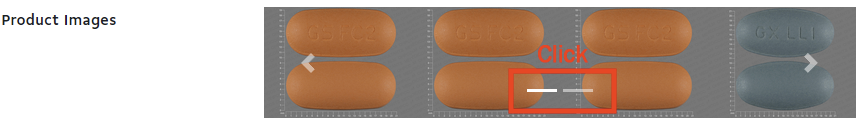

## Step 4: 'Nested' table

### 4.1 Type 1

#### Example 1: Table Single page
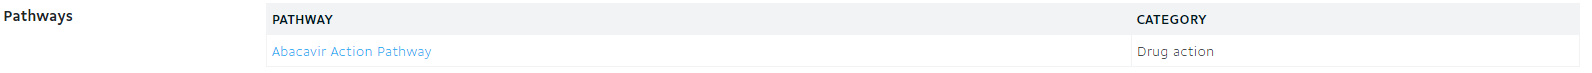


#### Example 2: Table Single page + Paragraph
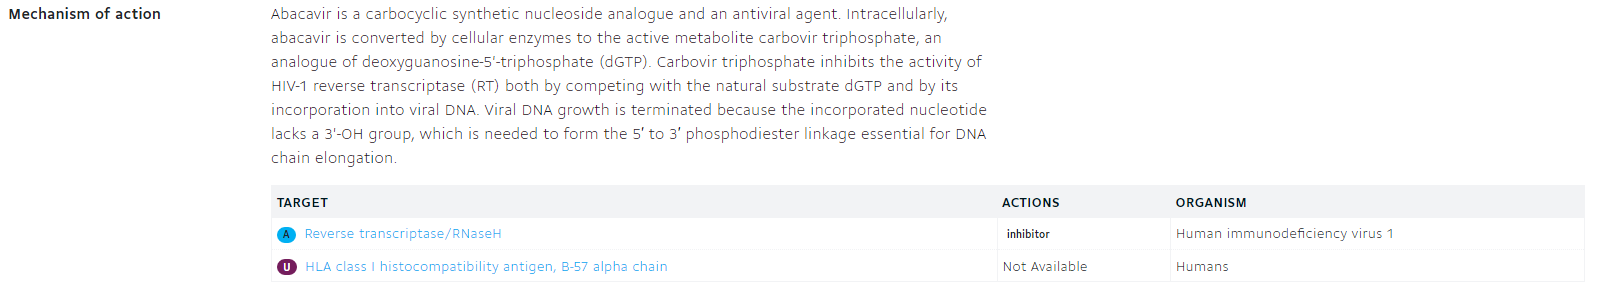

#### Example 3: Table Multi-page
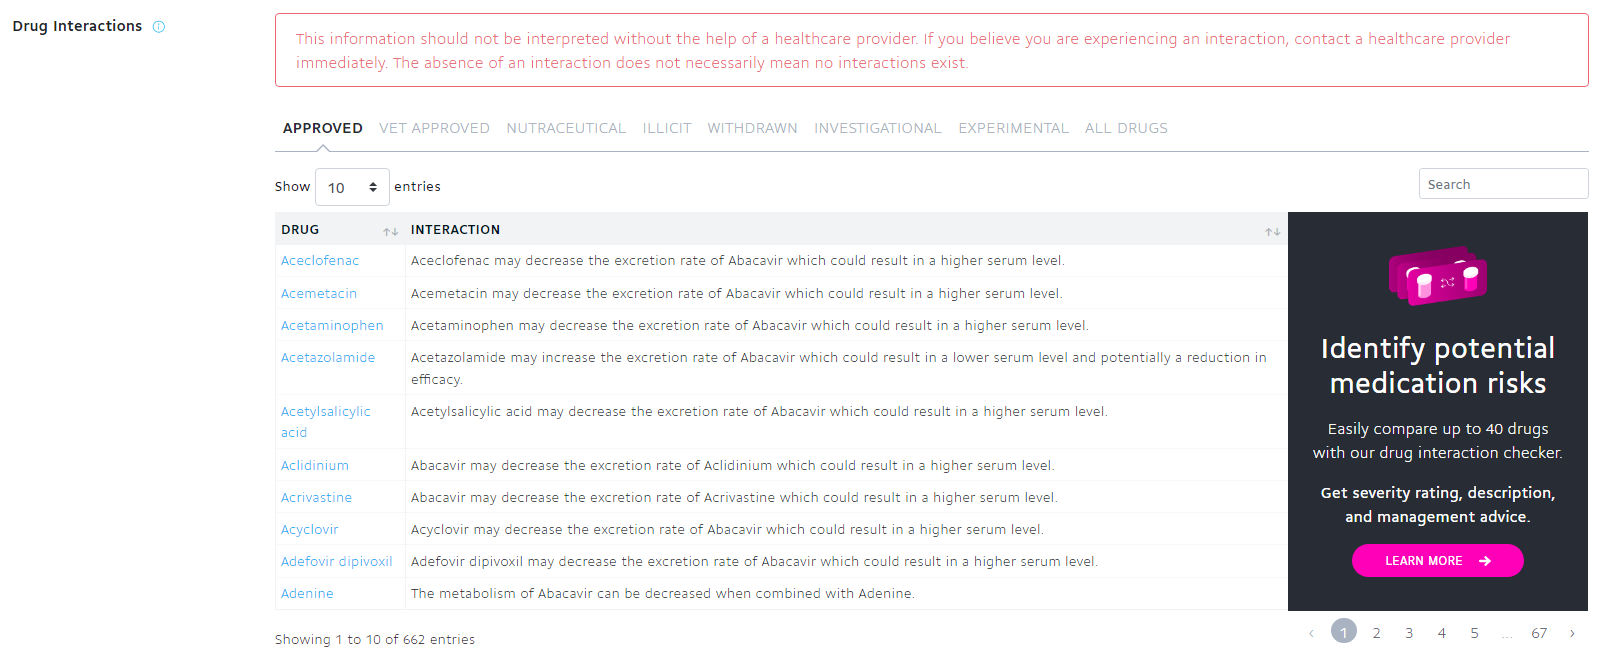

### 4.2 Type 2
h3: ('Targets', 'Enzymes', 'Carriers', 'Transporters')

https://go.drugbank.com/drugs/DB01048

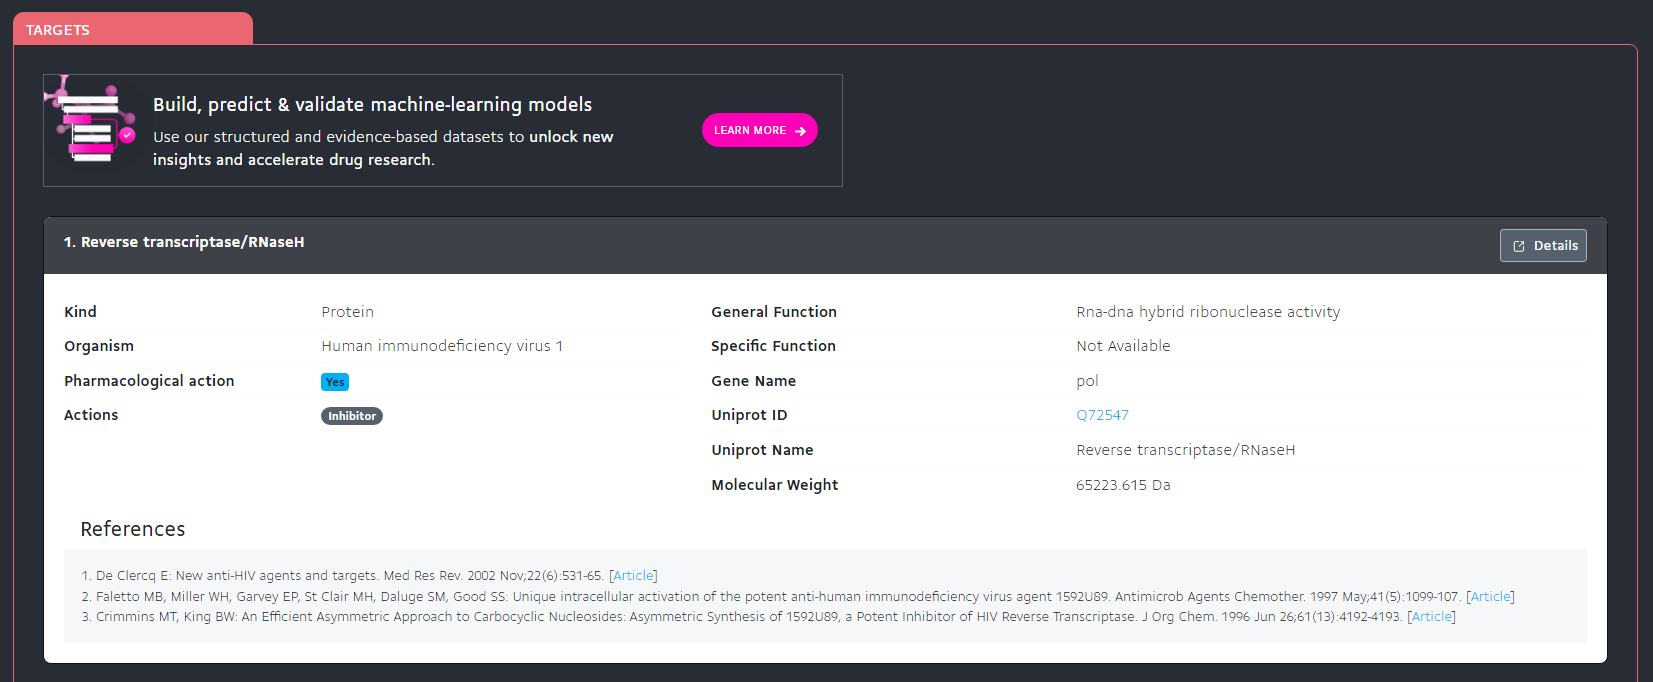

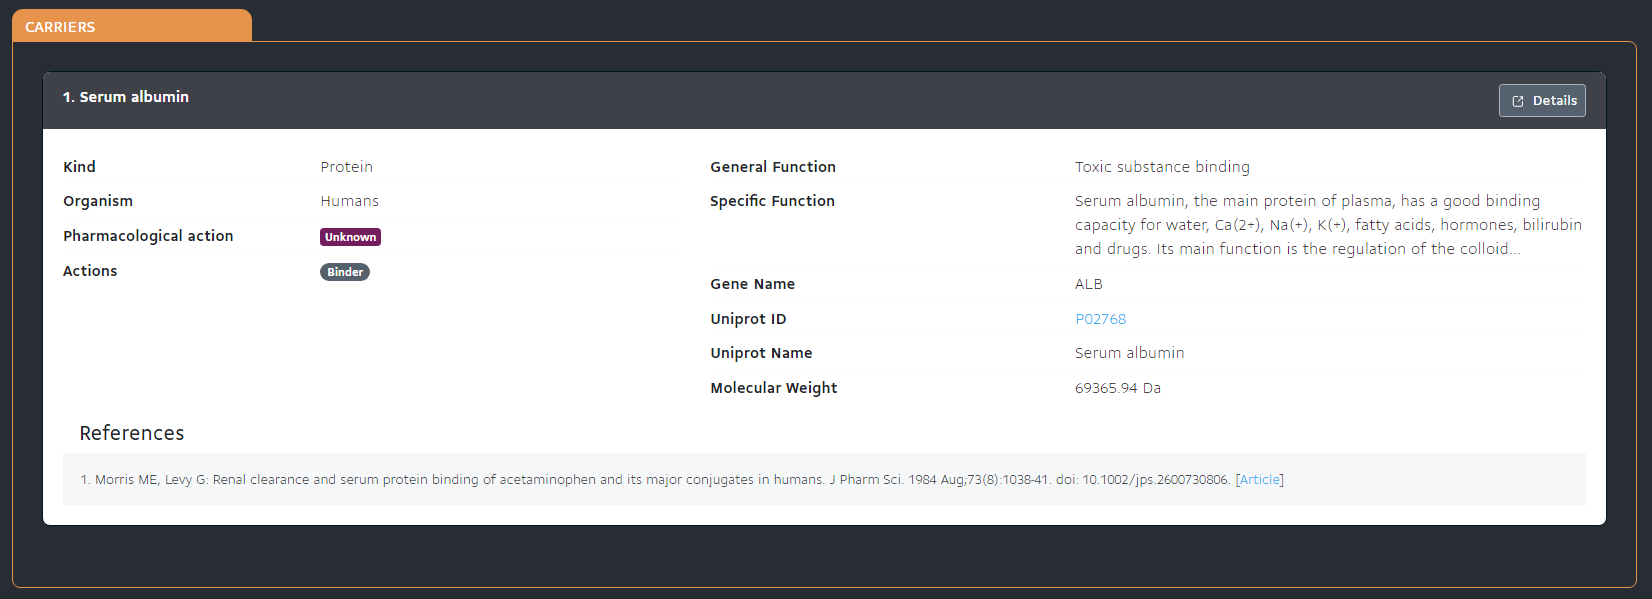

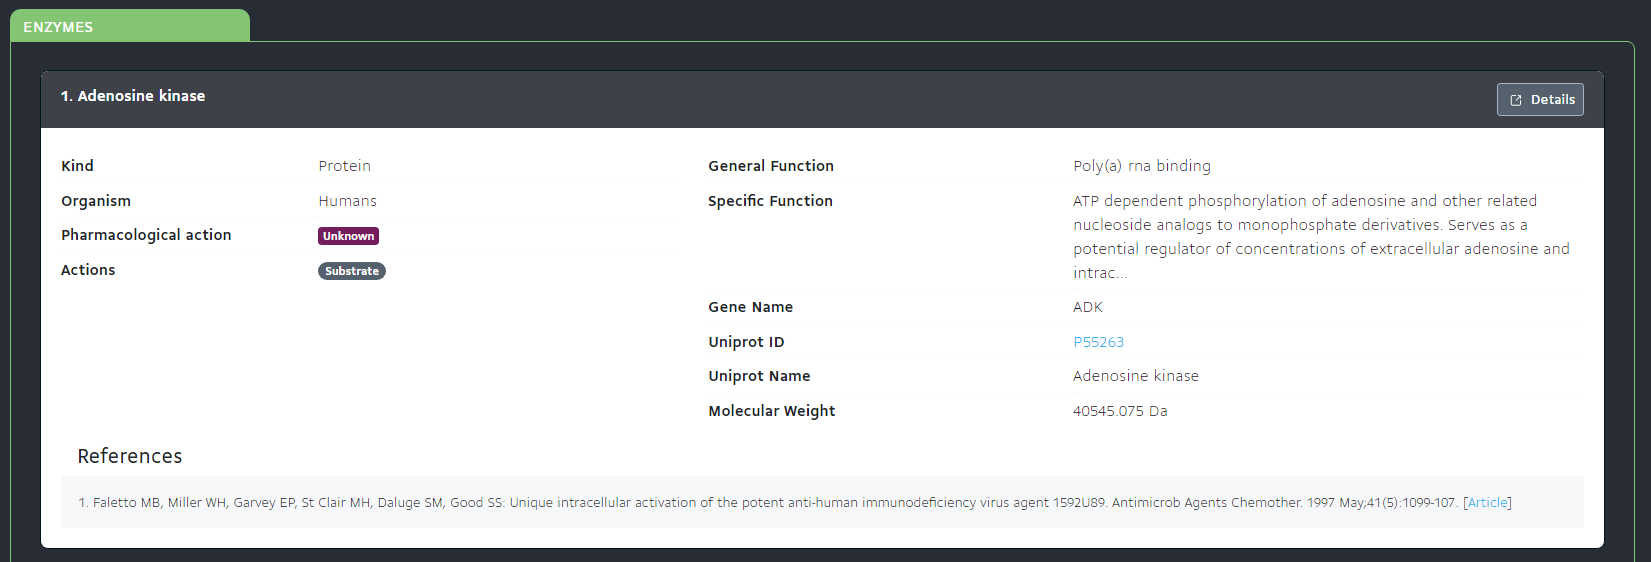

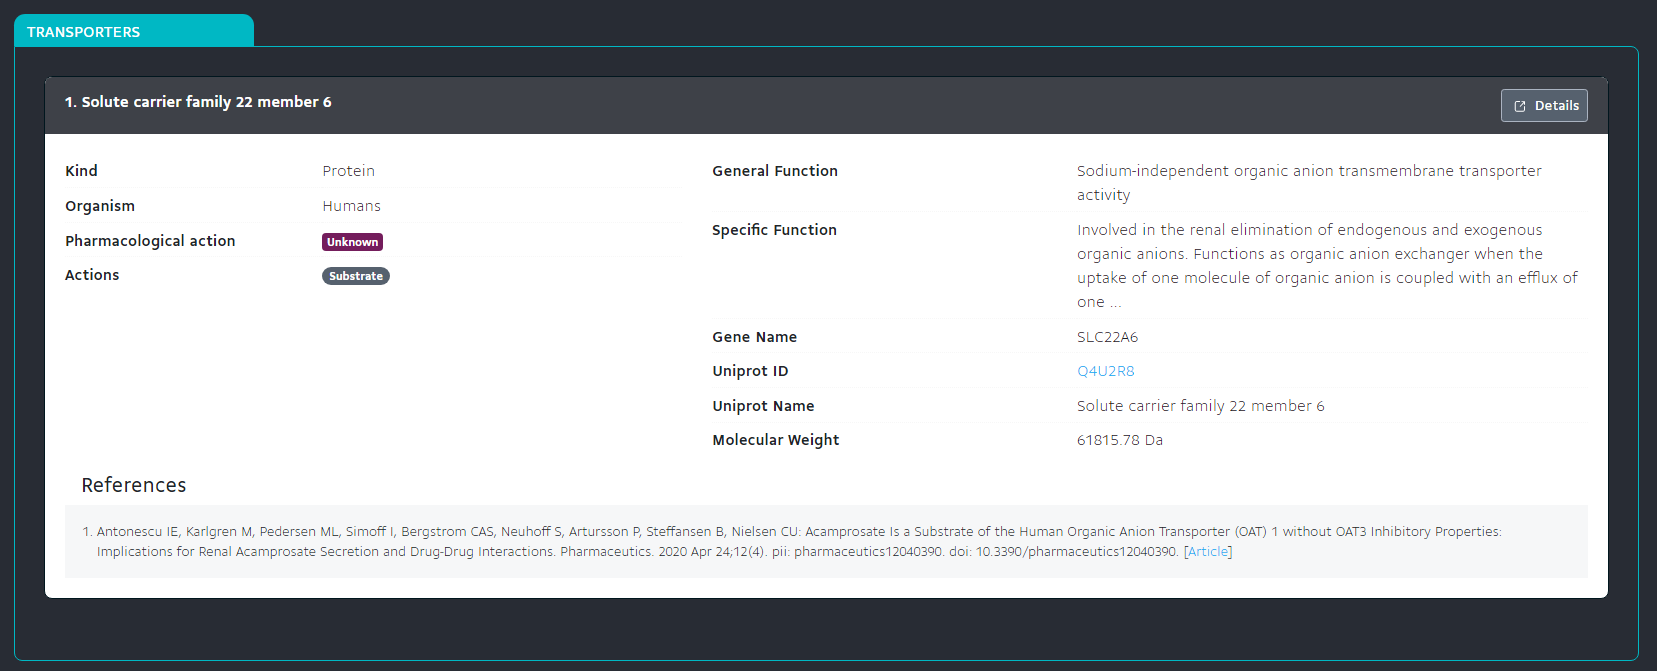

# Avoid of these banners

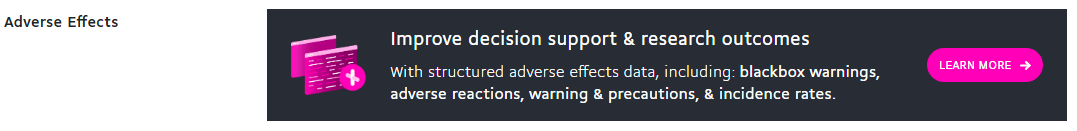

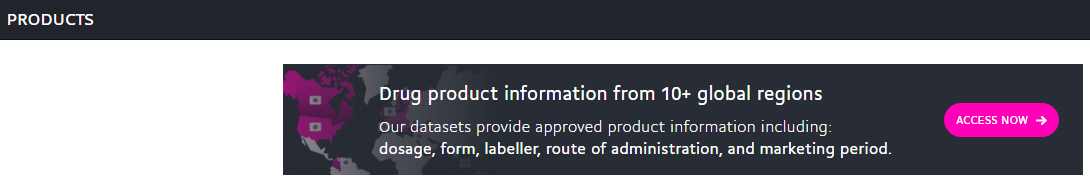

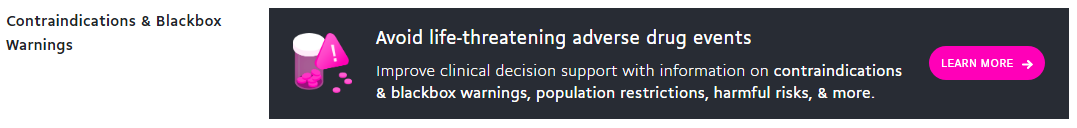

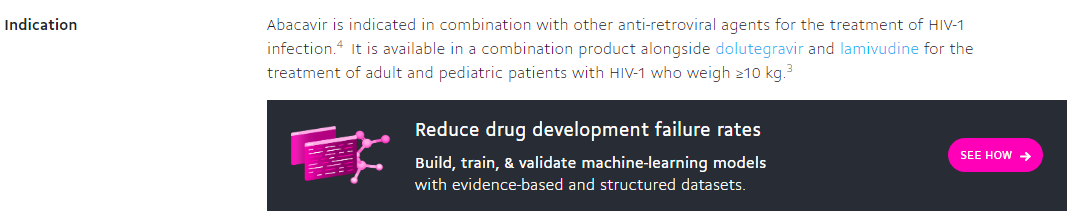

## Step 2. Website's Dynamic content

### Selenium 
- **What is selenium?**:
    - The selenium package is used to automate web browser interaction from Python.
- **Objective**: 
    - Create Action
        - Click 1-N pages automatically
- **Read more**:
    - https://www.selenium.dev/documentation/

### 2.1 Selenium for Image

#### Step 1: Install Pakage

In [ ]:
# pip install selenium

#### Step 2: Import Libraries

In [ ]:
from selenium import webdriver
from selenium.webdriver import Firefox, Chrome, Edge
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementNotVisibleException
from selenium.webdriver.support.wait import WebDriverWait

In [ ]:
browser = Chrome()
browser.get("https://go.drugbank.com/drugs/DB01048")

#### Step 3: Create 1 Click Action

In [ ]:
product_image_next_xpath = '//*[@id="product-carousel"]/ol/li[2]'

In [ ]:
product_image_next_element = browser.find_element(By.XPATH, product_image_next_xpath)

In [ ]:
product_image_next_element.click()

#### Step 4: While loop click

In [ ]:
%%time
browser = Chrome()
wait = WebDriverWait(browser, timeout=10)
browser.get("https://go.drugbank.com/drugs/DB01048")
product_image_next_xpath = '//*[@id="product-carousel"]/ol/li[2]'

new_product_images = [] 

old_html = browser.page_source
old_soup = BeautifulSoup(new_html)

CPU times: total: 141 ms
Wall time: 4.5 s


In [ ]:
%%time
image_page = len(old_soup.find_all('li',{'data-target':'#product-carousel'}))
print(image_page)
rnd = 1
while rnd <= image_page :
    new_html = browser.page_source
    new_soup = BeautifulSoup(new_html)
    
    time.sleep(2)
    
    for dd in  new_soup.find_all('dd', {'class': 'col-xl-10 col-md-9 col-sm-8'}):
        divs = dd.find_all('div')
        for div in divs:
            if div.get('id'):
                if div.get('id') == 'product-carousel-row':
                    imgs = dd.find_all('img')
                    for img in imgs:
                        image = img['src']
                        if image not in new_product_images:
                            new_product_images.append(image)
    try:
        product_image_next_element = browser.find_element(By.XPATH, product_image_next_xpath)
        product_image_next_element.click()
        rnd += 1
    except NoSuchElementException:
        browser.quit()

2
CPU times: total: 125 ms
Wall time: 4.31 s


### <span style="color:green"> Result </span>

In [ ]:
new_product_images

['//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/54569-559420180907-15195-g6nyyq.jpg?1536301314',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/49702-0206-13_NLMIMAGE10_67193389.jpg?1498428323',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/50090-087420180913-8702-glwlgg.jpg?1536863625',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/53808-099020180907-15195-1wf0yq6.jpg?1536297287',
 '',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/49702-0217-18_NLMIMAGE10_631931D9.jpg?1498428326',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/54569-488320180907-15195-115cqvk.jpg?1536299367',
 '//s3-us-west-2.amazonaws.com/drugbank/product_images/images/thumb/49702-0221-18_NLMIMAGE10_5F192FC9.jpg?1498428328']

In [ ]:
len(new_product_images)

8

In [ ]:
for img in new_product_images:
    display(Image(url=img, width=150))

### 2.2 Selenium for Table


#### Step 1: Install Pakage

In [ ]:
# pip install selenium

#### Step 2: Import Libraries

In [ ]:
from selenium import webdriver
from selenium.webdriver import Firefox, Chrome, Edge
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from selenium.webdriver.support.wait import WebDriverWait

#### Step 3: Browser Simulation

In [ ]:
browser = Chrome()
browser.get("https://go.drugbank.com/drugs/DB01048")

### + Action

#### Step 4: Create 1 Click Action

In [ ]:
xpath = '//*[@id="drug-interactions-table_next"]/a'

In [ ]:
next_element = browser.find_element(By.XPATH, xpath)

In [ ]:
next_element.click()

#### Step 5: Get HTML page_soure

In [ ]:
html = browser.page_source

#### Step 6: Convert to BeautifulSoup

In [ ]:
s_soup = BeautifulSoup(html)

In [ ]:
s_soup

#### Step 7: While loop 5 clicks
- **Problem**:  browser need 'time' to find element in HTML
- **Solve**:  `time.sleep(2)`

In [ ]:
browser = Chrome()
browser.get("https://go.drugbank.com/drugs/DB01048")

In [ ]:
iteration = 0
xpath = '//*[@id="drug-interactions-table_next"]/a'
nextElement = browser.find_element(By.XPATH, xpath)
wait = WebDriverWait(browser, timeout=10)
while iteration <= 5 :
    # time.sleep(2)
    next_element = wait.until(EC.visibility_of_element_located((By.XPATH, xpath)))
    nextElement.click()
    iteration += 1

### Test Action

In [ ]:
browser = Chrome()
browser.get("https://go.drugbank.com/drugs/DB01048")

In [ ]:
%%time
browser = Chrome()
browser.get("https://go.drugbank.com/drugs/DB01048")

wait = WebDriverWait(browser, timeout=10)

xpath = '//*[@id="drug-interactions-table_next"]/a'
html = browser.page_source
s_soup = BeautifulSoup(html)
table = s_soup.find('table',{'id':'drug-interactions-table'})

keys=[]
for k in table.find_all('th'):
    key = k.text.replace('\n','').lower().replace(' ', '_').replace('-','_')
    if key != 'integrate_drug_drug_interactions_in_your_software':
        keys.append(key)
print(keys)
subDict = []

['drug', 'interaction']
CPU times: total: 46.9 ms
Wall time: 6.38 s


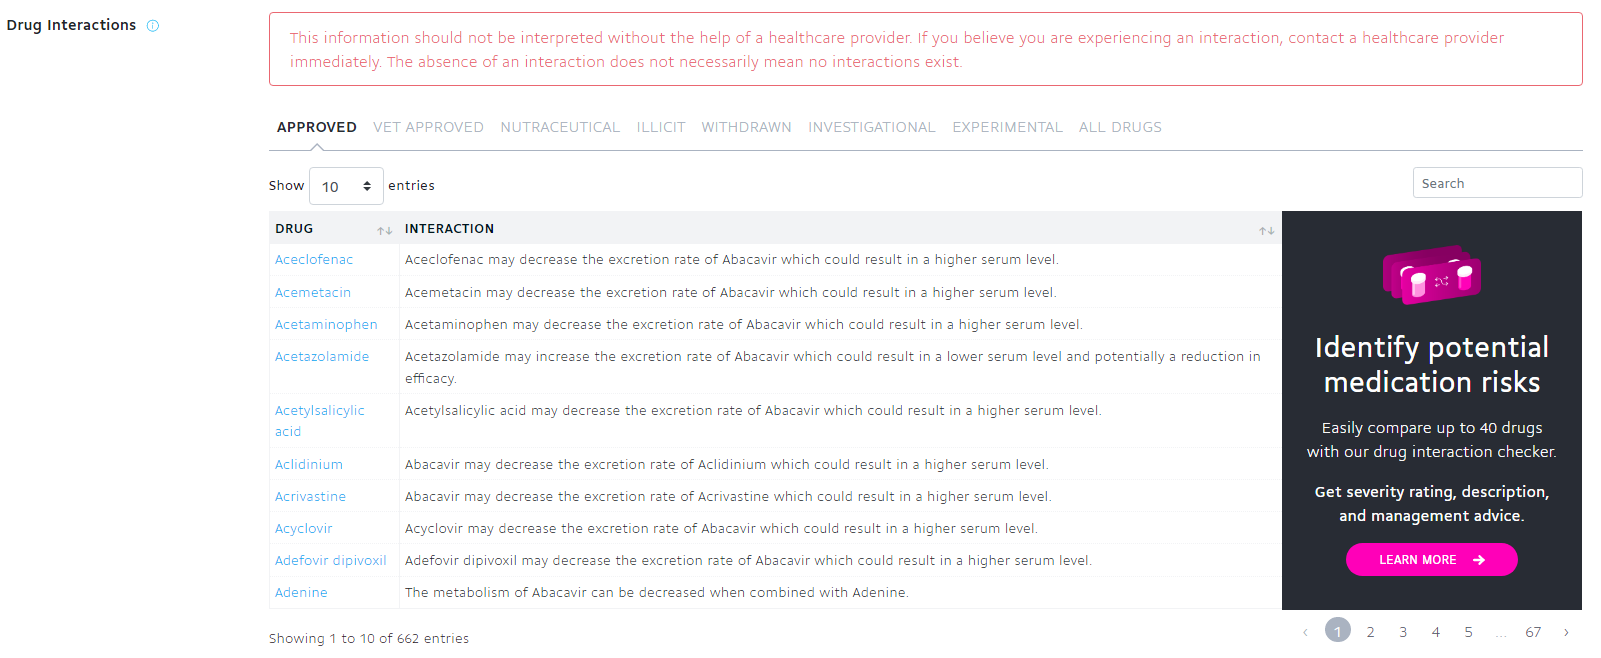

#### While True 1 Table (Page 1-N)

In [ ]:
%%time
i = 1

while True:
    range_ = [n for n in range(101)[::20]]
    if i in range_:
        print('Page:',i)
        
    
    new_html = browser.page_source
    new_soup = BeautifulSoup(new_html)
    time.sleep(1)
    table = new_soup.find('table',{'id':'drug-interactions-table'}).find('tbody')
    values = []
    
    for v in table.find_all('tr'):
        k = 0
        k_value = []
        for k in range(len(keys)):
            value = v.find_all('td')[k]
            k_value.append(value.text)
            k += 1
        d = dict(zip(keys,k_value))
        subDict.append(d)

    try:
        next_element = wait.until(EC.visibility_of_element_located((By.XPATH, xpath)))
        next_element.click()
        i += 1
        
    except:
        browser.quit()
        break

Page: 20
Page: 40
Page: 60
CPU times: total: 4.61 s
Wall time: 1min 18s


In [ ]:
# len(subDict)

670

#### <span style="color:green"> Result </span>

In [ ]:
subDict

#### Convert to Pandas dataFrame

In [ ]:
df = pd.DataFrame(subDict)

In [ ]:
df

,drug,interaction
0,Aceclofenac,Aceclofenac may decrease the excretion rate of...
1,Acemetacin,Acemetacin may decrease the excretion rate of ...
2,Acetaminophen,Acetaminophen may decrease the excretion rate ...
3,Acetazolamide,Acetazolamide may increase the excretion rate ...
4,Acetylsalicylic acid,Acetylsalicylic acid may decrease the excretio...
...,...,...
665,Viloxazine,Abacavir may decrease the excretion rate of Vi...
666,Vortioxetine,Abacavir may decrease the excretion rate of Vo...
667,Warfarin,Abacavir may decrease the excretion rate of Wa...
668,Yellow fever vaccine,The therapeutic efficacy of Yellow fever vacci...


### 4.2 Type 2
h3: ('Targets', 'Enzymes', 'Carriers', 'Transporters')

#### h3 HTML is type of these tables

In [ ]:
h3s = []
for h3 in soup.find_all('div',{'class':'bond-list-container'}):
    print(h3.get('id'))
    h3s.append(h3)
print(len(h3s))

targets
enzymes
2


In [ ]:
subDict2 = []

In [ ]:
subDict2.clear()

#### Retrieve content in each tables

In [ ]:
for h3 in soup.find_all('div',{'class':'bond-list-container'}):
    header = h3.get('id')
    bond_cards = h3.find_all('div',{'class':'bond card'})
    d_bond_cards = []
    for bc in bond_cards:
        sub_header = bc.find('strong').text
        keys = []
        for k in bc.find_all('dt'):
            key = k.text.replace(' ', '_').lower()
            keys.append(key)
        values = []
        for v in bc.find_all('dd'):
            value = v.text
            values.append(value)
    
        d = dict(zip(keys,values))
        sh_d = {sub_header:d}
        d_bond_cards.append(sh_d)
    h_d = {header:d_bond_cards}
    subDict2.append(h_d)

In [ ]:
d_bond_cards

[{'1. Adenosine kinase': {'kind': 'Protein',
   'organism': 'Humans',
   'pharmacological_action': 'Unknown',
   'actions': 'Substrate',
   'general_function': 'Poly(a) rna binding',
   'specific_function': 'ATP dependent phosphorylation of adenosine and other related nucleoside analogs to monophosphate derivatives. Serves as a potential regulator of concentrations of extracellular adenosine and intrac...',
   'gene_name': 'ADK',
   'uniprot_id': 'P55263',
   'uniprot_name': 'Adenosine kinase',
   'molecular_weight': '40545.075 Da'}},
 {'2. Alcohol dehydrogenase 6': {'kind': 'Protein',
   'organism': 'Humans',
   'pharmacological_action': 'Unknown',
   'actions': 'Substrate',
   'general_function': 'Zinc ion binding',
   'specific_function': 'Not Available',
   'gene_name': 'ADH6',
   'uniprot_id': 'P28332',
   'uniprot_name': 'Alcohol dehydrogenase 6',
   'molecular_weight': '39088.335 Da'}},
 {'3. UDP-glucuronosyltransferase 1-1': {'kind': 'Protein',
   'organism': 'Humans',
   'phar

In [ ]:
# t_enzymes = pd.DataFrame(h_d)

In [ ]:
# t_enzymes

,enzymes
0,"{'1. Adenosine kinase': {'kind': 'Protein', 'o..."
1,{'2. Alcohol dehydrogenase 6': {'kind': 'Prote...
2,{'3. UDP-glucuronosyltransferase 1-1': {'kind'...


#### <span style="color:green"> Result </span>

In [ ]:
# subDict2

[{'targets': [{'1. Reverse transcriptase/RNaseH': {'kind': 'Protein',
     'organism': 'Human immunodeficiency virus 1',
     'pharmacological_action': 'Yes',
     'actions': 'Inhibitor',
     'general_function': 'Rna-dna hybrid ribonuclease activity',
     'specific_function': 'Not Available',
     'gene_name': 'pol',
     'uniprot_id': 'Q72547',
     'uniprot_name': 'Reverse transcriptase/RNaseH',
     'molecular_weight': '65223.615 Da'}},
   {'2. HLA class I histocompatibility antigen, B-57 alpha chain': {'kind': 'Protein',
     'organism': 'Humans',
     'pharmacological_action': 'Unknown'}}]},
 {'enzymes': [{'1. Adenosine kinase': {'kind': 'Protein',
     'organism': 'Humans',
     'pharmacological_action': 'Unknown',
     'actions': 'Substrate',
     'general_function': 'Poly(a) rna binding',
     'specific_function': 'ATP dependent phosphorylation of adenosine and other related nucleoside analogs to monophosphate derivatives. Serves as a potential regulator of concentrations of 